In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# **Loading and Preprocessing the Data**

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [6]:
# Convert labels to categorical one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
print('Training data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


# **Visualizing Data**

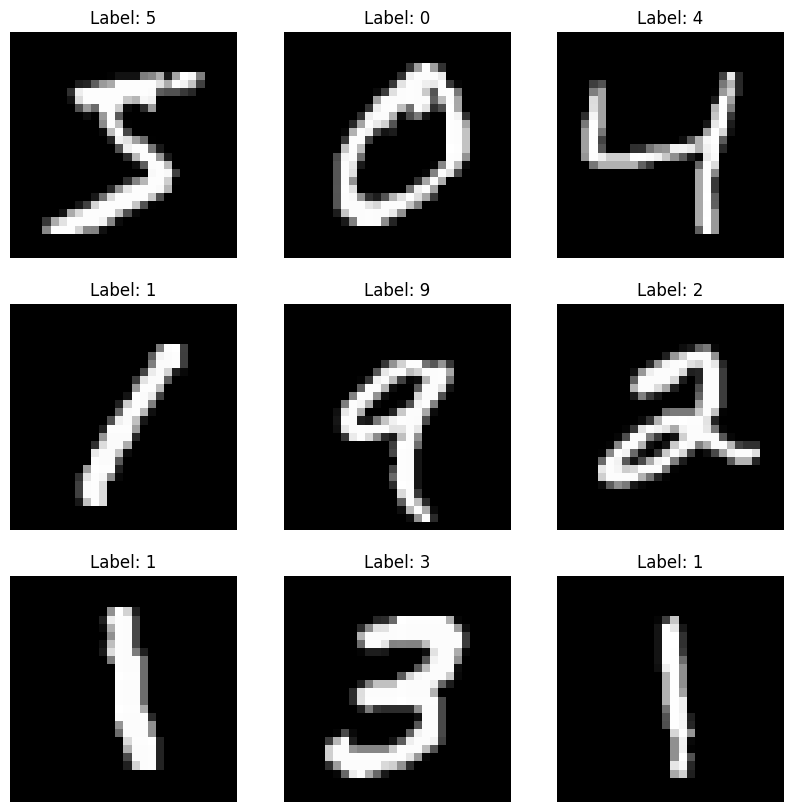

In [8]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title('Label: {}'.format(y_train[i].argmax()))
    plt.axis('off')
plt.show()

# **Building ANN Model**

In [9]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  #Input image to a 1D vector
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons
    Dense(64, activation='relu'),   # Second hidden layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (one for each class)
])

In [10]:
# Compiling Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Model Architecture Display
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

# **Model Training**

In [11]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training history
plt.figure(figsize=(12, 4))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8649 - loss: 0.4670 - val_accuracy: 0.9587 - val_loss: 0.1353
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9637 - loss: 0.1217 - val_accuracy: 0.9560 - val_loss: 0.1561
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9748 - loss: 0.0813 - val_accuracy: 0.9722 - val_loss: 0.0946
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9825 - loss: 0.0561 - val_accuracy: 0.9732 - val_loss: 0.0941
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9708 - val_loss: 0.1012
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9883 - loss: 0.0367 - val_accuracy: 0.9759 - val_loss: 0.0889
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9924 - loss: 0.0240 - val_accuracy: 0.9751 - val_loss: 0.0961
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9924 - loss: 0.0229

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

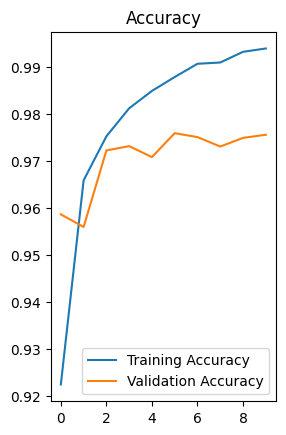

In [12]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

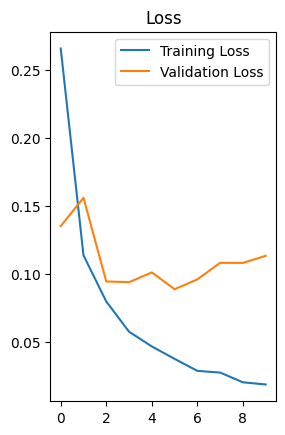

In [13]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

# **Model Evaluation**

In [14]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9736 - loss: 0.1114
Test accuracy: 0.9768000245094299


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


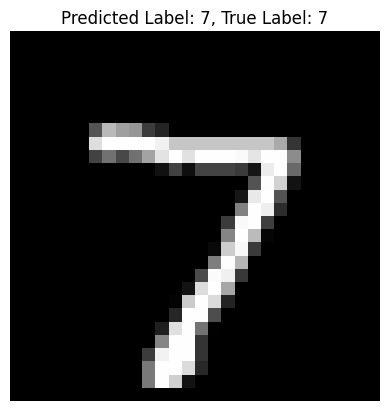

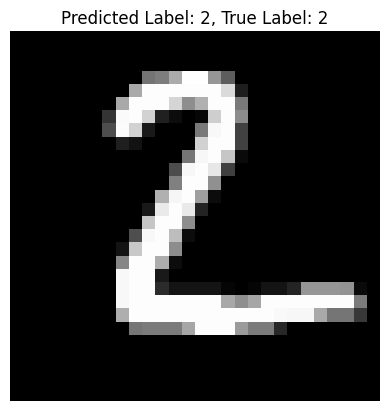

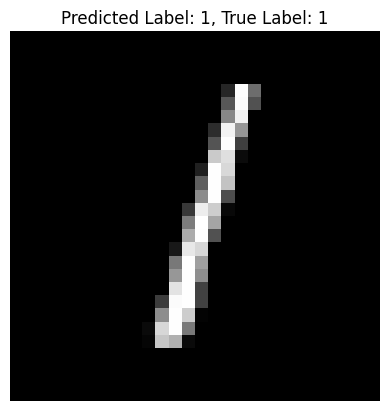

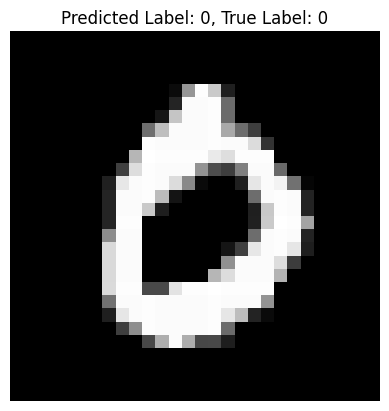

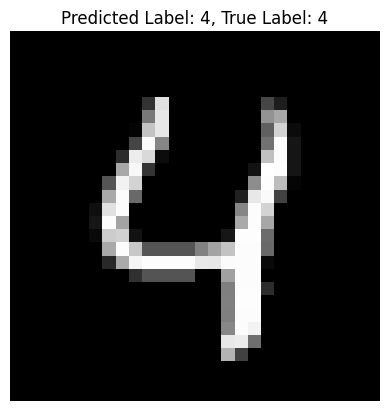

In [16]:
# Makeing predictions on test data
predictions = model.predict(x_test)

# Display few predictions
for i in range(5):
  plt.imshow(x_test[i], cmap='gray')
  plt.title(f'Predicted Label: {predictions[i].argmax()}, True Label: {y_test[i].argmax()}')
  plt.axis('off')
  plt.show()

In [18]:
# Saving Model
model.save('mnist_ann_model.keras')

In [19]:
# Loading Model
loaded_model = tf.keras.models.load_model('mnist_ann_model.keras')

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(x_test, y_test)
print('Test accuracy of loaded model:', test_accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.1114
Test accuracy of loaded model: 0.9768000245094299
